### Notebook Imports and Packages

In [76]:
#import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm # color map
#from mpl_toolkits import mplot3d # 3D plot required library
#from mpl_toolkits.mplot3d.axes3d import Axes3D
import numpy as np

from sympy import symbols, diff
from math import log

import sys
print(sys.version)
#print(matplotlib.__version__)
%matplotlib inline

3.8.0 (tags/v3.8.0:fa919fd, Oct 14 2019, 19:37:50) [MSC v.1916 64 bit (AMD64)]


### Example - Data Viz with 3D Charts

### $$f(x,y) = \frac{1}{3^{-x^2-y^2}+1}$$

minimise $$f(x,y) = \frac{1}{r + 1}$$ where $r$ is $3^{-x^2-y^2}$

In [77]:
def f(x,y):
    r = 3**(-x**2 - y**2)
    return 1 / ( r + 1)

In [78]:
# Generating data
# X data type is numpy array
X = np.linspace(start = -2, stop = 2, num = 200) 
y = np.linspace(start = -2, stop = 2, num = 200)

print('Shape of X array', X.shape)

X, y = np.meshgrid(X,y) # 3D plot require 2D input
print('Shape after mesh', X.shape)

Shape of X array (200,)
Shape after mesh (200, 200)


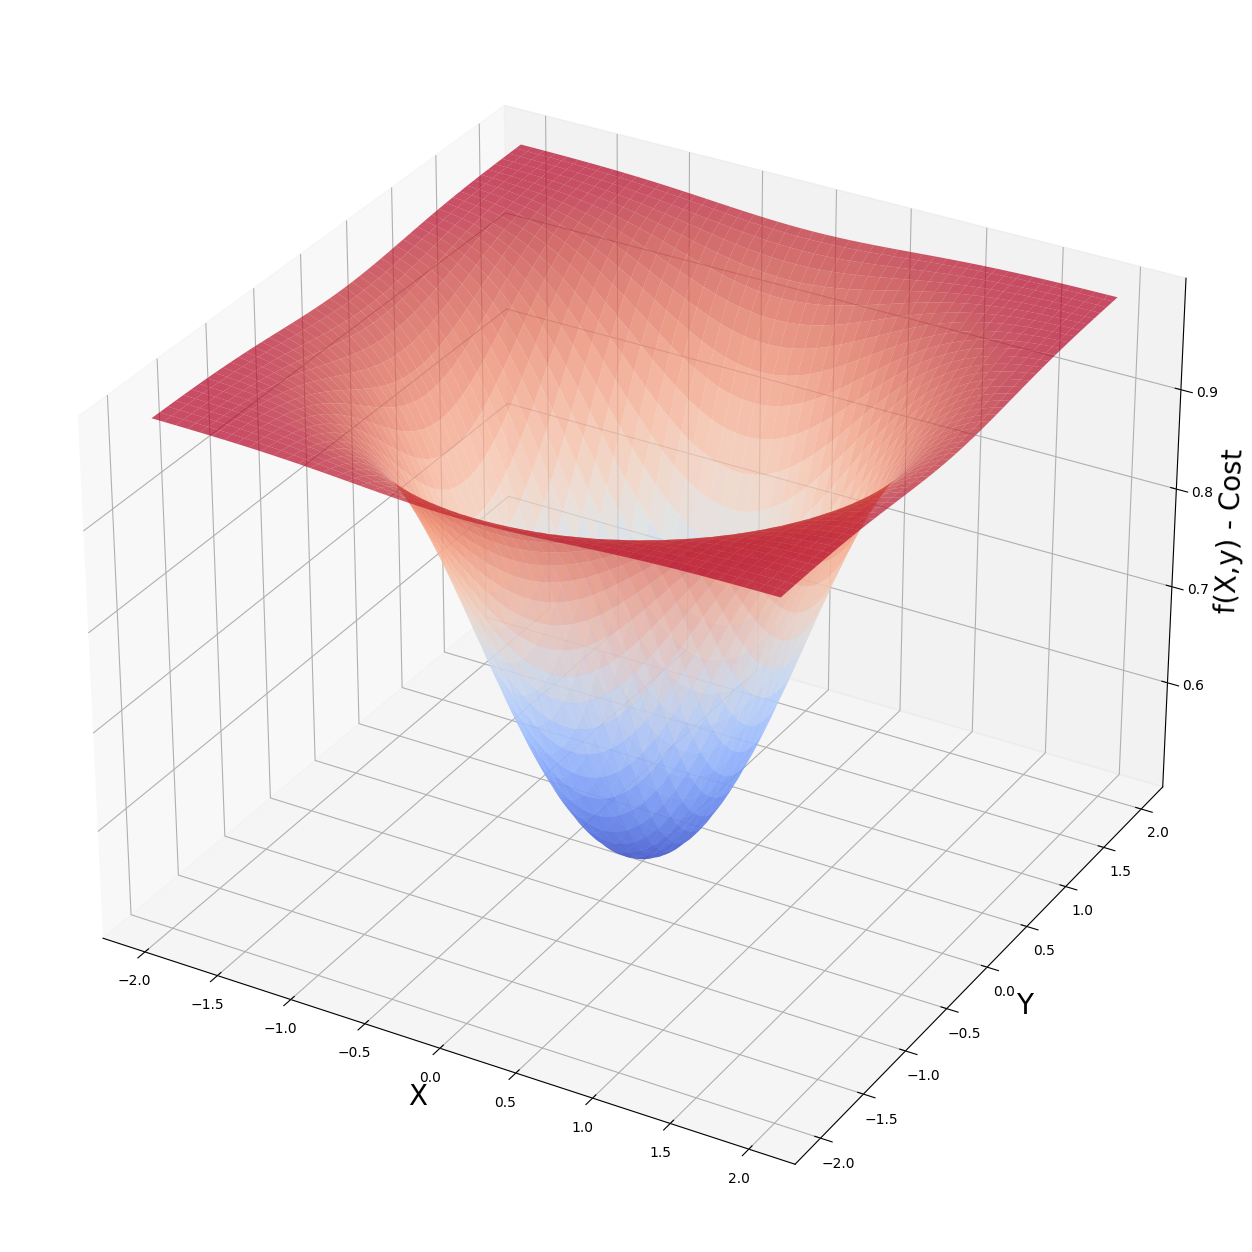

In [79]:
# Generating 3D plot
fig = plt.figure(figsize= [16,16])
ax = plt.axes(projection = '3d')

ax.set_xlabel('X', fontsize = 20)
ax.set_ylabel('Y', fontsize = 20)
ax.set_zlabel('f(X,y) - Cost', fontsize = 20)

ax.plot_surface(X,y,np.array(f(X,y)), cmap = cm.coolwarm, alpha = 0.7)
plt.show()

### Partial Derivatives & Symbolic Computation
### $$\frac{\partial f}{\partial x} = \frac{2x \ln(3) \cdot 3^{-x^2 - y^2}}{( 3^ { -x^2 - y^2 }+1)^2}$$
### $$\frac{\partial f}{\partial y} = \frac{2y \ln(3) \cdot 3^{-x^2 - y^2}}{( 3^ { -x^2 - y^2 }+1)^2}$$

In [80]:
a, b = symbols('x,y')
print('Out cost function f(x,y) is:', f(a,b))
print('Partial derivative wrt x is:', diff(f(a,b),a))
print('Partial derivative wrt y is:', diff(f(a,b),b))
print('Value of f(x,y) at x=1.8 y=1.0 is:',f(a,b).evalf(subs={a:1.8,b:1.0})) # evaluate cost function at x = 1.8 and y = 1.0
print('Value of partial derivative wrt x at x=1.8 y=1.0 is:',diff(f(a,b),a).evalf(subs={a:1.8,b:1.0})) # evaluate cost function at x = 1.8 and y = 1.0

Out cost function f(x,y) is: 1/(3**(-x**2 - y**2) + 1)
Partial derivative wrt x is: 2*3**(-x**2 - y**2)*x*log(3)/(3**(-x**2 - y**2) + 1)**2
Partial derivative wrt y is: 2*3**(-x**2 - y**2)*y*log(3)/(3**(-x**2 - y**2) + 1)**2
Value of f(x,y) at x=1.8 y=1.0 is: 0.990604794032582
Value of partial derivative wrt x at x=1.8 y=1.0 is: 0.0368089716197505


### Batch Gradient Descent with Sympy

**Calculating gradient with SymPy:**<br>

This is a slower process because FOR loop will perform diff every single iteration

In [81]:
learning_rate = 0.1
max_iter = 500
params = np.array([1.8, 1.0]) # initial guess

for n in range(max_iter):
    gradient_x = diff(f(a,b),a).evalf(subs={a:params[0], b:params[1]})
    gradient_y = diff(f(a,b),b).evalf(subs={a:params[0], b:params[1]})
    gradients = np.array([gradient_x,gradient_y])
    params = params - learning_rate * gradients

print('Values in gradient array', gradients)
print('Minimum occurs at x value of:', params[0])
print('Minimum occurs at y value of:', params[1])
print('The cost is:', f(params[0], params[1]))

Values in gradient array [2.01013037525579e-11 1.11673909736433e-11]
Minimum occurs at x value of: 3.45838599885832e-11
Minimum occurs at y value of: 1.92132555492129e-11
The cost is: 0.500000000000000


**Calculating Gradient by Providing partial derivative function:**<br>

This will be much faster because you don't need to calculate partial derivative in the FOR loop

In [82]:
# Partial derivative functions

def fpx(x,y):
    r = 3**(-x**2 - y**2)
    return 2*x*log(3)*r / (r+1)**2

def fpy(x,y):
    r = 3**(-x**2 - y**2)
    return 2*y*log(3)*r / (r+1)**2

In [83]:
learning_rate = 0.1
max_iter = 500
params = np.array([1.8, 1.0]) # initial guess

for n in range(max_iter):
    gradient_x = fpx(params[0],params[1])
    gradient_y = fpy(params[0],params[1])
    gradients = np.array([gradient_x,gradient_y])
    params = params - learning_rate * gradients

print('Values in gradient array', gradients)
print('Minimum occurs at x value of:', params[0])
print('Minimum occurs at y value of:', params[1])
print('The cost is:', f(params[0], params[1]))

Values in gradient array [2.01013038e-11 1.11673910e-11]
Minimum occurs at x value of: 3.458385998858304e-11
Minimum occurs at y value of: 1.9213255549212797e-11
The cost is: 0.5


### Graphing 3D Gradient Descent & Adv Numpy Arrays

In [84]:
# Advanced Numpy Array Practice:

kirk = np.array([['Captain', 'Guitar']])
print(kirk.shape)

hs_band = np.array([['Black Thought','MC'],['Questlove', 'Drums']])
print(hs_band.shape)

# Selecting array
print('selecting the first row hs_band[0]:', hs_band[0])
print('hs_band[0][0]:', hs_band[0][0])

# axis is a really confusing parameters
# axis = 0 means adding element in row
# axis = 1 means adding element in column
the_roots = np.append(arr=hs_band, values = kirk.reshape(2,1) , axis = 1) # adding column
print(the_roots)

the_roots = np.append(arr=hs_band, values = kirk , axis = 0) # adding row
print(the_roots)

print('Printing names', the_roots[:, 0]) # print first column

(1, 2)
(2, 2)
selecting the first row hs_band[0]: ['Black Thought' 'MC']
hs_band[0][0]: Black Thought
[['Black Thought' 'MC' 'Captain']
 ['Questlove' 'Drums' 'Guitar']]
[['Black Thought' 'MC']
 ['Questlove' 'Drums']
 ['Captain' 'Guitar']]
Printing names ['Black Thought' 'Questlove' 'Captain']


In [89]:
learning_rate = 0.1
max_iter = 500
params = np.array([1.8, 1.0]) # initial guess
values_array = params
print(values_array.shape) ## 2 rows
values_array = params.reshape(1,2) # convert to 1 row 2 column
print(values_array.shape)

for n in range(max_iter):
    gradient_x = fpx(params[0],params[1])
    gradient_y = fpy(params[0],params[1])
    gradients = np.array([gradient_x,gradient_y])
    params = params - learning_rate * gradients
    values_array = np.append(arr=values_array, values=params.reshape(1,2),axis=0)
    # alternatively, you can append with concatenate operation as well
    #values_array = np.concatenate((values_array, params.reshape(1,2)),axis=0)

print('Values in gradient array', gradients)
print('Minimum occurs at x value of:', params[0])
print('Minimum occurs at y value of:', params[1])
print('The cost is:', f(params[0], params[1]))

(2,)
(1, 2)
Values in gradient array [2.01013038e-11 1.11673910e-11]
Minimum occurs at x value of: 3.458385998858304e-11
Minimum occurs at y value of: 1.9213255549212797e-11
The cost is: 0.5


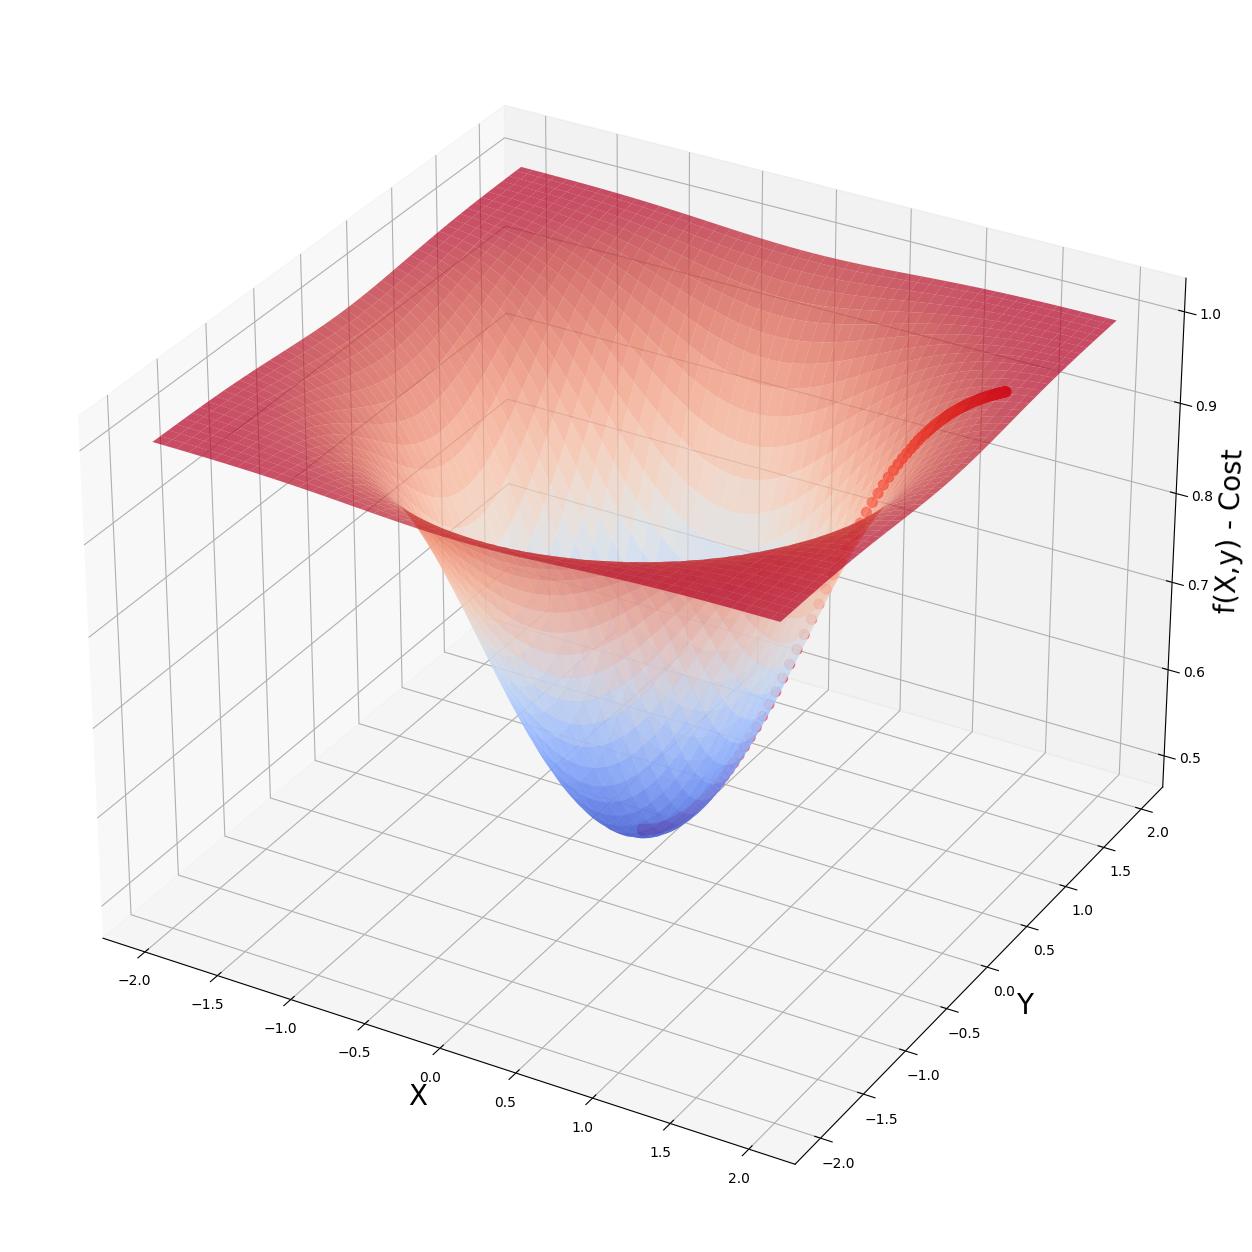

In [86]:
# Generating 3D plot
fig = plt.figure(figsize= [16,16])
ax = plt.axes(projection = '3d')

ax.set_xlabel('X', fontsize = 20)
ax.set_ylabel('Y', fontsize = 20)
ax.set_zlabel('f(X,y) - Cost', fontsize = 20)

ax.plot_surface(X,y,np.array(f(X,y)), cmap = cm.coolwarm, alpha = 0.7)
ax.scatter(values_array[:,0], values_array[:,1], f(values_array[:,0],values_array[:,1]), s = 50, color = 'red')

plt.show()